### Business Questions
1. Who are the top revenue-generating customers?
2. What products contribute most to revenue?
3. What is the monthly revenue trend?
4. Which customers are repeat buyers?
5. What is the average order value?


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("carrie1/ecommerce-data")

print("Path to dataset files:", path)

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\carrie1\ecommerce-data\versions\1


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("../data/online_retail.csv", encoding='ISO-8859-1')

# Basic inspection
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# Remove missing CustomerID
df = df.dropna(subset=['CustomerID'])

In [8]:
# Remove cancelled orders
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

In [9]:
# Create TotalAmount
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [10]:
# Convert date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

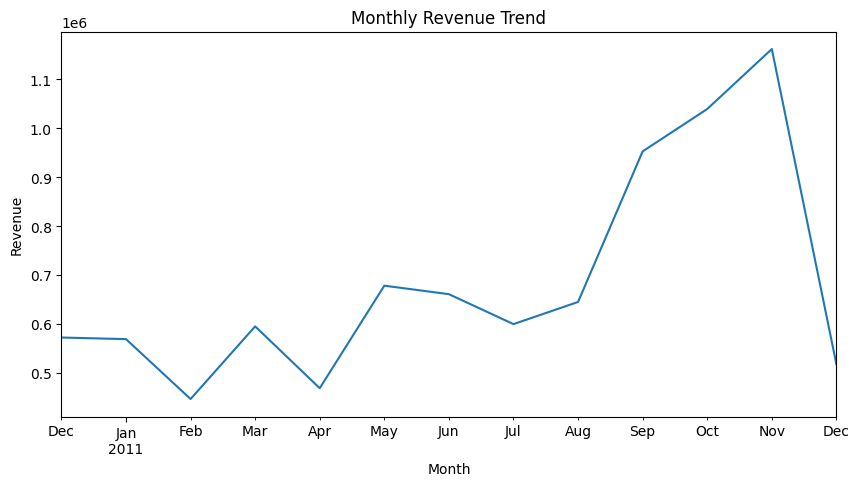

In [11]:
monthly_revenue = df.groupby('Month')['TotalAmount'].sum()

monthly_revenue.plot(kind='line', figsize=(10,5))
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


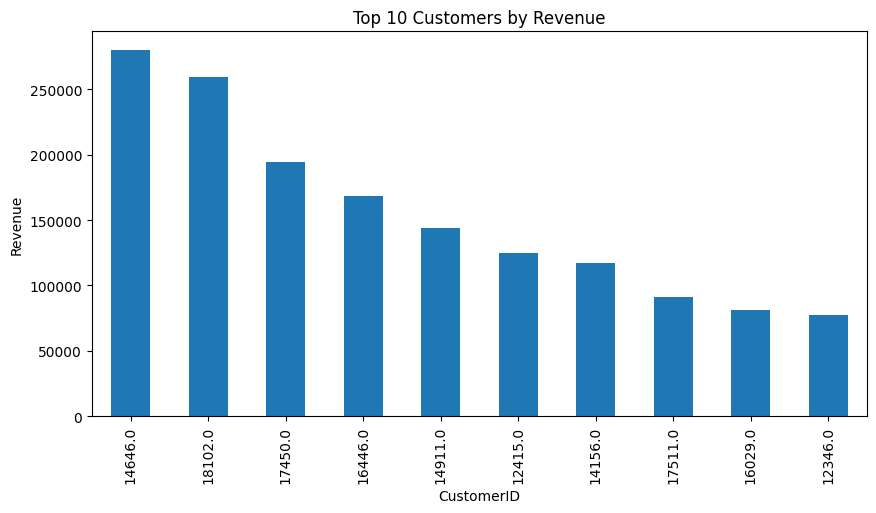

In [12]:
top_customers = df.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10)

top_customers.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Customers by Revenue")
plt.ylabel("Revenue")
plt.show()


In [13]:
aov = df.groupby('InvoiceNo')['TotalAmount'].sum().mean()
print(aov)


480.86595639974104


<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='Month'>

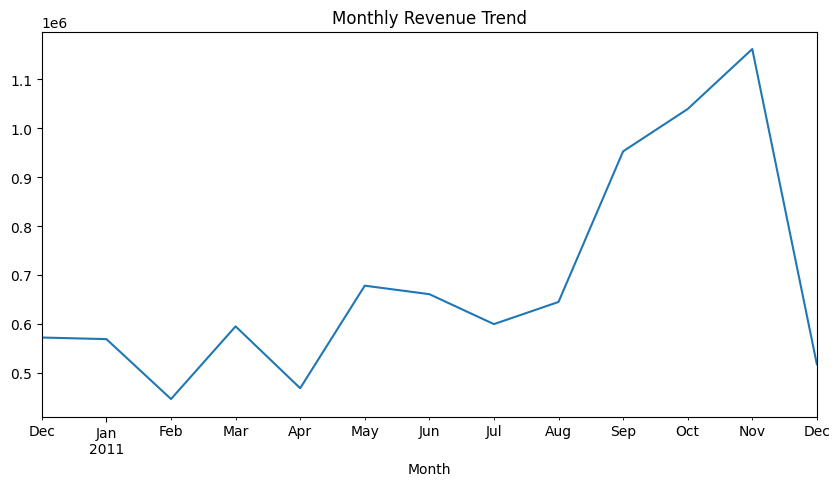

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly = df.groupby('Month')['TotalAmount'].sum()

monthly.plot(figsize=(10,5), title="Monthly Revenue Trend")


<Axes: title={'center': 'Top 10 Customers'}, xlabel='CustomerID'>

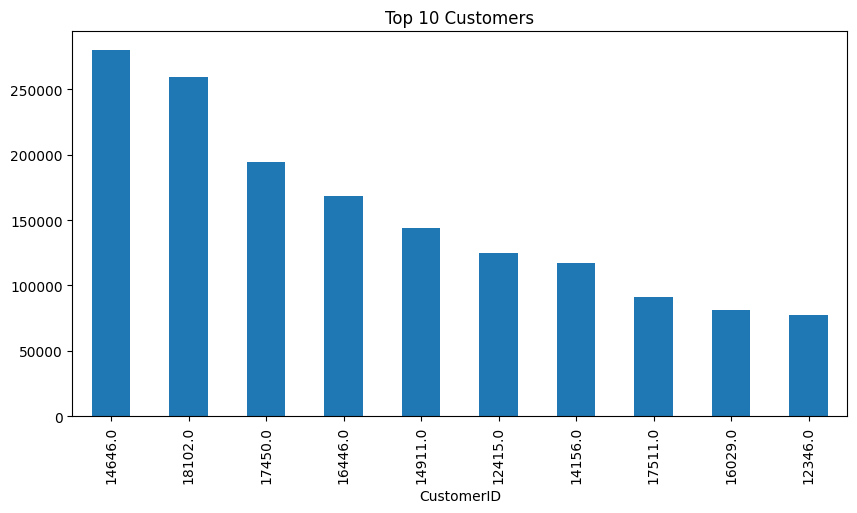

In [15]:
top_customers = (
    df.groupby('CustomerID')['TotalAmount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_customers.plot(kind='bar', figsize=(10,5), title="Top 10 Customers")
